<a href="https://colab.research.google.com/github/mio17006/Intro/blob/main/Video_Game_Sales_Exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#The dataset that will be used for this analysis is the Video Game Sales 2016 dataset from Kaggle.com. 
#The purpose of this analysis is to explore and find and potential trends in the variables present in this dataset in order to gain business insight.
#Some questions that I will attempt to answer by using this dataset are:
# 1) Which publishers have published the most games as of the release of this dataset?
# 2) Who are the leading developers of games at the time of release of this dataset?
# 3) Look at the trend of global sales all-time and which year video game sales peaked
# 4) Which genre of game (Action, RPG, Sports, etc.) has sold the most globally?
# 5) Which platform has sold the most games of all-time?
# 6) Breaking down the percentage of total sales by region (North America, Japan, Europe, Other)
# 7) Is there a correlation between critic scores and global sales?

#Loading data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Video_Games_Sales_as_at_22_Dec_2016.csv']))

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016.csv


In [ ]:
#Viewing columns of data
df2.head()
#The top 5 best-selling games of all time are printed in the result. The best selling game of all-time is Wii Sports for the Nintendo Wii which released in 2006.

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Looking at and dropping null data
df2.isnull().sum()
df2 = df2.dropna()
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(10), object(6)
memory usage: 906.4+ KB


In [ ]:
#Count of number of games published by each publisher 
print(df2['Publisher'].value_counts())
print(df2['Publisher'].nunique())
#Electronic Arts has published the most games, followed by Activision, Namco Bandai, Ubisoft, and Konami.


Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Locus                              1
Warp                               1
Valve                              1
Elite                              1
Red Flagship                       1
Name: Publisher, Length: 582, dtype: int64
582


In [ ]:
#Count the number of games developed by each publisher
print(df2['Developer'].value_counts())
print(df2['Developer'].nunique())
#Ubisoft has developed the most games of all-time at 204, followed by EA Sports at 172 games published, EA Canada at 167 game, Konami at 162, and Capcom at 139.

Ubisoft                                   204
EA Sports                                 172
EA Canada                                 167
Konami                                    162
Capcom                                    139
                                         ... 
Genki, Kojima Productions                   1
Warner Bros. Interactive Entertainment      1
THQ, Altron                                 1
Netherock Ltd.                              1
Interchannel-Holon                          1
Name: Developer, Length: 1696, dtype: int64
1696


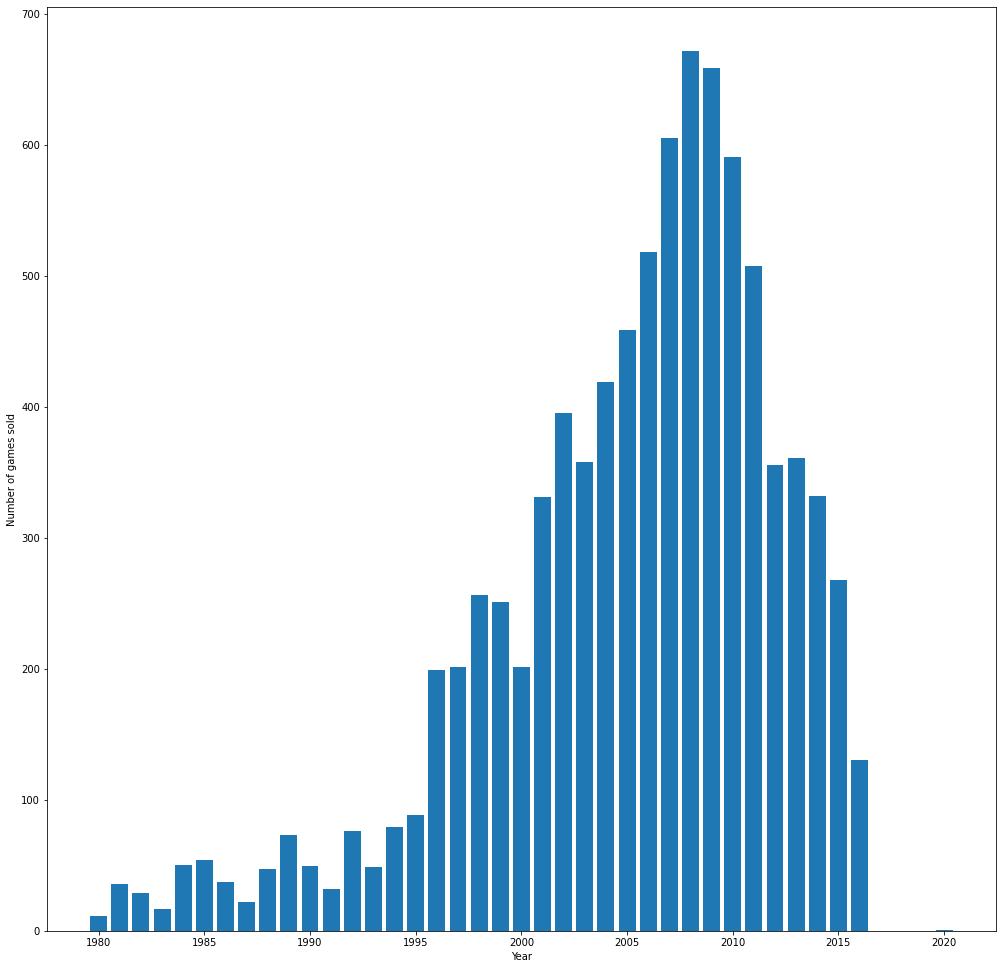

In [ ]:
#Trend of video game sales from 1995-2016
all_time = df2.groupby('Year_of_Release')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(17,17))
plt.bar(all_time.index,all_time)
plt.xlabel("Year")
plt.ylabel("Number of games sold")
plt.show()
#The graph shows a steady rise in global sales, with sales peaking from 2008-09, and steadily dropping in the years following. One reason for this steep decline in sales could be explained by the fact that newer games have not had as much time to sell compared to older games so as a result their sales are lower.

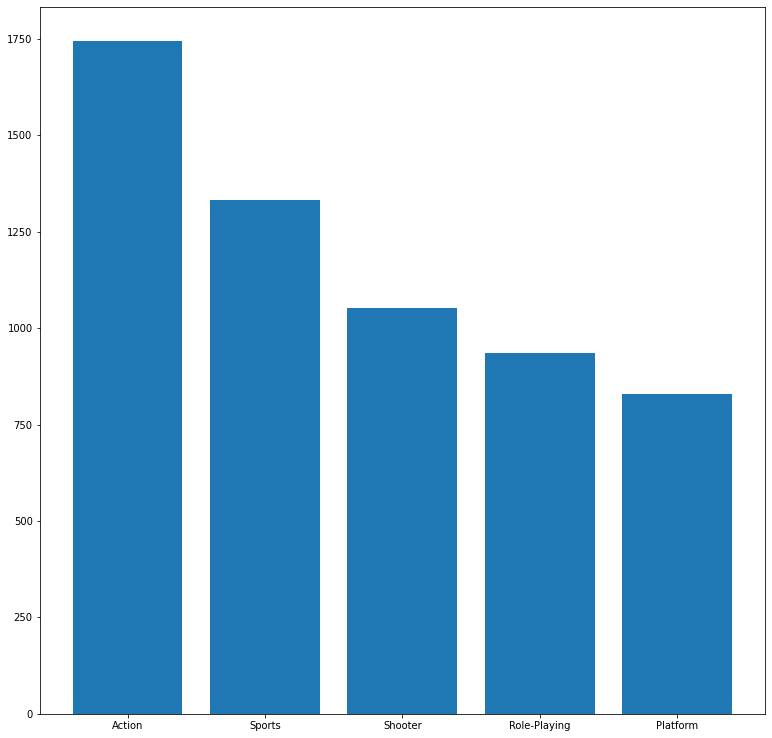

In [ ]:
#Bar chart of the count of video games sold by genre all-time
gat = df2.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(13,13))
plt.bar(gat.index,gat)
plt.xlabel= "Genre"
plt.ylabel = "Count of games sold globally"
plt.show()
#Action game have sold the most number of games at around 1200, followed by sports at around 800, shooters at a little less than 800, role-playing at around 450, and racing at a little less than 450.


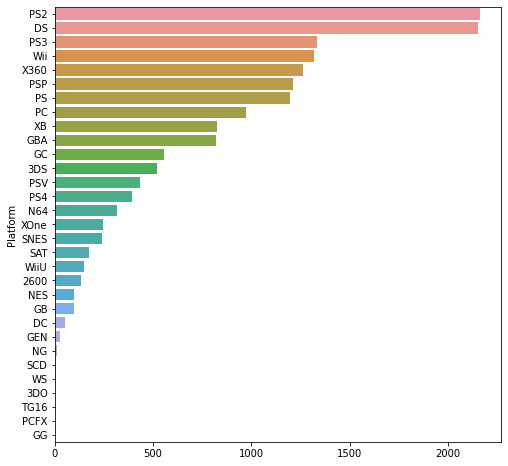

In [ ]:
#Number of games on the best selling list by platform
import seaborn as sns
plat_count = pd.crosstab(df2.Platform,df2.Genre)
plat_count_total = plat_count.sum(axis=1).sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(y = plat_count_total.index, x = plat_count_total.values, orient='h')
plt.ylabel = "Platform"
plt.xlabel = "Number of games"
plt.title = "Count of titles in the best selling list by platform"
plt.show()
#The graph shows that the PS2 had the most titles featured, followed by the Xbox 360, PS3, and the PC.

Text(0.5, 1.0, 'Share of Global Sales by Region')

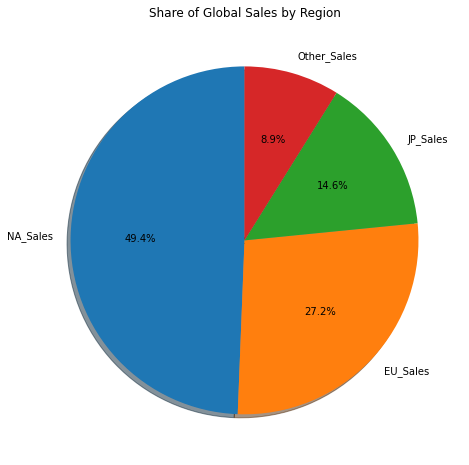

In [5]:
#Percentage of total sales by region
data = df2
top_sale_reg = data[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Share of Global Sales by Region")
#North American sales have accounted for more than half of the global sales all-time, followed by European sales, other sales, and Japanese sales.


In [ ]:
#Total revenue by region (in millions)
top_sale_reg



,region,sale
0,NA_Sales,2692.35
1,EU_Sales,1611.31
2,JP_Sales,437.88
3,Other_Sales,564.27


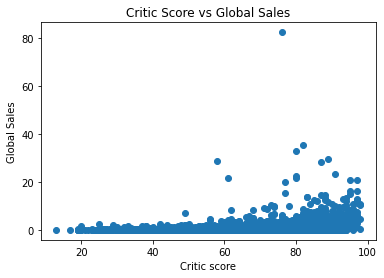

In [ ]:
#Critic score vs global sales
plt.scatter(df2.Critic_Score,df2.Global_Sales)
plt.xlabel("Critic score")
plt.ylabel("Global Sales")
plt.title("Critic Score vs Global Sales")
plt.show()
#There does not seem to be a correlation between the critic score and global sales.

